In [1]:
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


In [2]:
text = "cluster the clustering clusters cluster useful search study research clustering useful like liked"

In [3]:
tokenized_word=word_tokenize(text)
print(tokenized_word)

['cluster', 'the', 'clustering', 'clusters', 'cluster', 'useful', 'search', 'study', 'research', 'clustering', 'useful', 'like', 'liked']


In [4]:
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 10 samples and 13 outcomes>


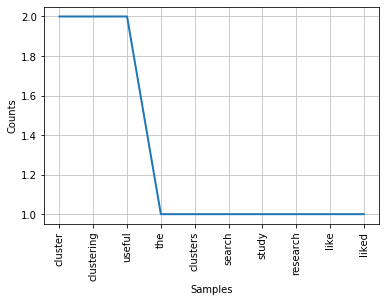

In [5]:
fdist.plot(30,cumulative=False)
plt.show()

In [6]:
stop_words=set(stopwords.words("english"))
print(stop_words)

{'nor', "you've", 'not', "wasn't", 'weren', 'by', 'the', "didn't", 'off', 'should', 'once', "mightn't", 'all', 'needn', 'is', 's', 'with', "she's", 'll', 'am', 'their', 'if', 'own', 'd', 'again', 'who', 'both', 'its', "isn't", 'up', 'your', 'to', 'there', 'on', 'mightn', 'most', 'my', 'our', 'which', 'o', 'while', 'now', 'how', 'can', 'm', 'what', 'as', 'couldn', 'for', 'ma', 'yourselves', 'mustn', 'haven', 'whom', 'just', "haven't", 'in', 'after', 'do', 'before', 'were', 'y', 'won', 'these', 'until', "hadn't", 'then', "it's", 'himself', 'has', 'a', 'between', 'some', 'other', "wouldn't", 'does', 'here', "won't", 'this', "should've", 'they', 'hasn', 've', 'isn', "doesn't", "don't", 'been', 'yourself', "you'll", 'she', 'under', 'aren', 'at', 'below', 'didn', 'we', 'those', 'of', 'out', "weren't", 'yours', "shouldn't", 'more', "needn't", 'few', 'or', 'than', 'too', 'him', 'was', 'only', 'very', "that'll", 'through', 'myself', 're', 'herself', 'when', 'itself', 'because', 'same', 'shan', 

In [7]:
filtered_sent=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Filterd Sentence:",filtered_sent)

Filterd Sentence: ['cluster', 'clustering', 'clusters', 'cluster', 'useful', 'search', 'study', 'research', 'clustering', 'useful', 'like', 'liked']


In [8]:
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['cluster', 'clustering', 'clusters', 'cluster', 'useful', 'search', 'study', 'research', 'clustering', 'useful', 'like', 'liked']
Stemmed Sentence: ['cluster', 'cluster', 'cluster', 'cluster', 'use', 'search', 'studi', 'research', 'cluster', 'use', 'like', 'like']


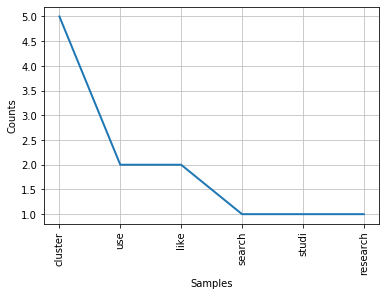

In [11]:
fdist_stemmed = FreqDist(stemmed_words)
fdist_stemmed.plot(30,cumulative=False)
plt.show()